In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
from pathlib import Path

In [16]:
df = pd.read_csv("IADH_results.tsv", sep="\t", header=0, index_col="id")
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df["len_x"] =  df["stop_x"] - df["start_x"]
df["len_y"] =  df["stop_y"] - df["start_y"]

df["percentage_similar"] = df["number_of_anchorpoints"] / df["profile_length"]

print(df.columns)
df[['genome_x', 'genome_y','list_x', 'list_y', 'len_x',
       'len_y', "number_of_anchorpoints",'profile_length', "percentage_similar"]][df["profile_length"]==6].sort_values("len_x", ascending=False).head(100)


Index(['begin_x', 'begin_y', 'end_x', 'end_y', 'first_x', 'first_y',
       'genome_x', 'genome_y', 'is_redundant', 'last_x', 'last_y', 'level',
       'list_x', 'list_y', 'number_of_anchorpoints', 'parent',
       'profile_length', 'start_x', 'start_y', 'stop_x', 'stop_y', 'len_x',
       'len_y', 'percentage_similar'],
      dtype='object')


,genome_x,genome_y,list_x,list_y,len_x,len_y,number_of_anchorpoints,profile_length,percentage_similar
id,,,,,,,,,
5403,bol,ath,45,5,170058,30822,3,6,0.500000
4901,bol,ath,44,1,165240,10794,3,6,0.500000
5251,bol,bol,38,45,160811,122968,3,6,0.500000
2891,bol,ath,38,1,155819,17930,4,6,0.666667
6825,bol,ath,44,4,150270,34026,3,6,0.500000
...,...,...,...,...,...,...,...,...,...
4797,bol,ath,45,3,43552,19724,3,6,0.500000
6148,bol,ath,37,2,43009,20495,3,6,0.500000
4642,bol,bol,41,39,42997,59468,3,6,0.500000


In [3]:
print(df.shape)
print(df.len_x.mean())
print(df.len_y.mean())

(7343, 24)
296481.7326705706
232250.29620046302


In [4]:
step_size = 0.1
bins = [i/10 for i in range(0,11)]
print(bins)
df['cat_similar'] = pd.cut(df['percentage_similar'], bins=bins, labels=bins[1:])
df.head(20)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


,begin_x,begin_y,end_x,end_y,first_x,first_y,genome_x,genome_y,is_redundant,last_x,...,parent,profile_length,start_x,start_y,stop_x,stop_y,len_x,len_y,percentage_similar,cat_similar
id,,,,,,,,,,,,,,,,,,,,,
1,4919,160,6323,2482,BolC5t33707H,AT3G02080,bol,ath,0,BolC5t35111H,...,NaN,2329,45030204,364138,54718262,5634542,9688058,5270404,0.377845,0.4
2,1090,2056,2199,3806,BolC5t29878H,AT1G13440,bol,ath,0,BolC5t30987H,...,NaN,1763,5918203,4608465,14288079,8352232,8369876,3743767,0.368123,0.4
3,90,193,940,1777,BolC5t28878H,AT1G02220,bol,ath,0,BolC5t29728H,...,NaN,1552,444804,428902,4912693,3984962,4467889,3556060,0.400129,0.5
4,4574,322,6807,1521,BolC9t57509H,BolC3t12886H,bol,bol,0,BolC9t59742H,...,NaN,2101,44491878,1593321,60684560,7967918,16192682,6374597,0.283674,0.3
5,3967,14643,4880,16209,BolC6t39126H,AT1G67140,bol,ath,0,BolC6t40039H,...,NaN,1531,38167572,25101016,44301298,28543840,6133726,3442824,0.356630,0.4
6,3558,12295,4378,13711,BolC8t50359H,AT3G52380,bol,ath,0,BolC8t51179H,...,NaN,1415,36176740,19421619,41426510,22513184,5249770,3091565,0.342049,0.4
7,5906,1227,6650,2425,BolC9t58841H,AT5G09210,bol,ath,0,BolC9t59585H,...,NaN,1237,55411872,2862719,59941960,5622475,4530088,2759756,0.380760,0.4
8,1573,7925,2435,9032,BolC1t01574H,AT4G22070,bol,ath,0,BolC1t02436H,...,NaN,1166,10127657,11691381,16437868,14050118,6310211,2358737,0.376501,0.4
9,6626,7,7271,1228,BolC9t59561H,AT5G01030,bol,ath,0,BolC9t60206H,...,NaN,1197,59834918,10638,63211039,2868863,3376121,2858225,0.365915,0.4


(-100000.0, 10000000.0)

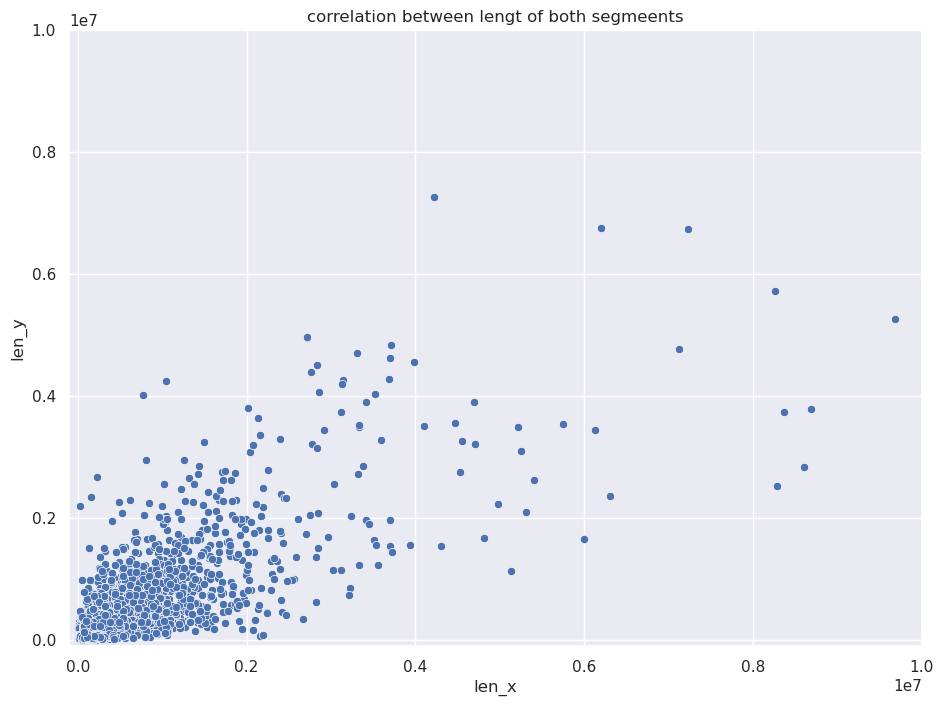

In [32]:
so = sns.scatterplot(data=df, x="len_x", y="len_y")
so.set(title="correlation between lengt of both segmeents")
so.set_xlim(-100000, 10000000)
so.set_ylim(-100000, 10000000)

[Text(0.5, 1.0, 'correlation between amouunt of genes and segement lengt in bp')]

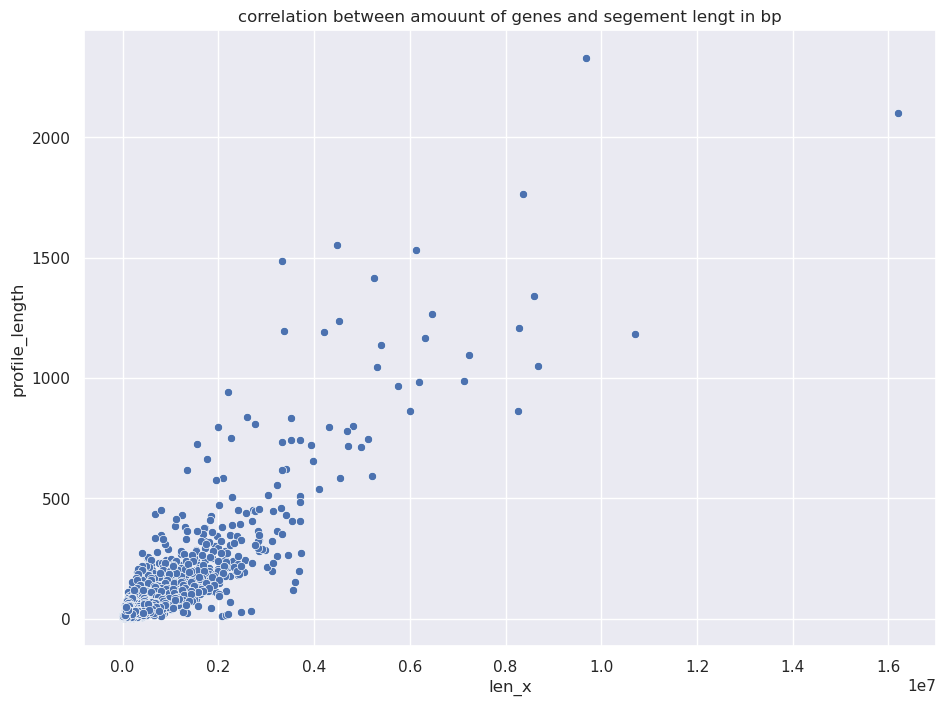

In [33]:
so = sns.scatterplot(data=df, x="len_x", y="profile_length")
so.set(title="correlation between amouunt of genes and segement lengt in bp")
# so.set_xlim(0, 10000)
# so.set_ylim(0, 30)

In [6]:
print(df[(df["cat_similar"]>=0.3) & (df["profile_length"]>=10)].shape)
print(df.shape)

for i in [0.3, 0.4, 0.5, 0.6, 0.7]:
    for j in [4, 6, 8, 10, 12]:
        print(f"{i},{j}: ", df[(df["cat_similar"]>=i) & (df["profile_length"]>=j)].shape)

(2715, 25)
(7343, 25)
0.3,4:  (4367, 25)
0.3,6:  (3720, 25)
0.3,8:  (3189, 25)
0.3,10:  (2715, 25)
0.3,12:  (2264, 25)
0.4,4:  (2828, 25)
0.4,6:  (2181, 25)
0.4,8:  (1650, 25)
0.4,10:  (1176, 25)
0.4,12:  (1025, 25)
0.5,4:  (1975, 25)
0.5,6:  (1328, 25)
0.5,8:  (797, 25)
0.5,10:  (633, 25)
0.5,12:  (562, 25)
0.6,4:  (1269, 25)
0.6,6:  (622, 25)
0.6,8:  (462, 25)
0.6,10:  (400, 25)
0.6,12:  (348, 25)
0.7,4:  (867, 25)
0.7,6:  (420, 25)
0.7,8:  (305, 25)
0.7,10:  (261, 25)
0.7,12:  (230, 25)


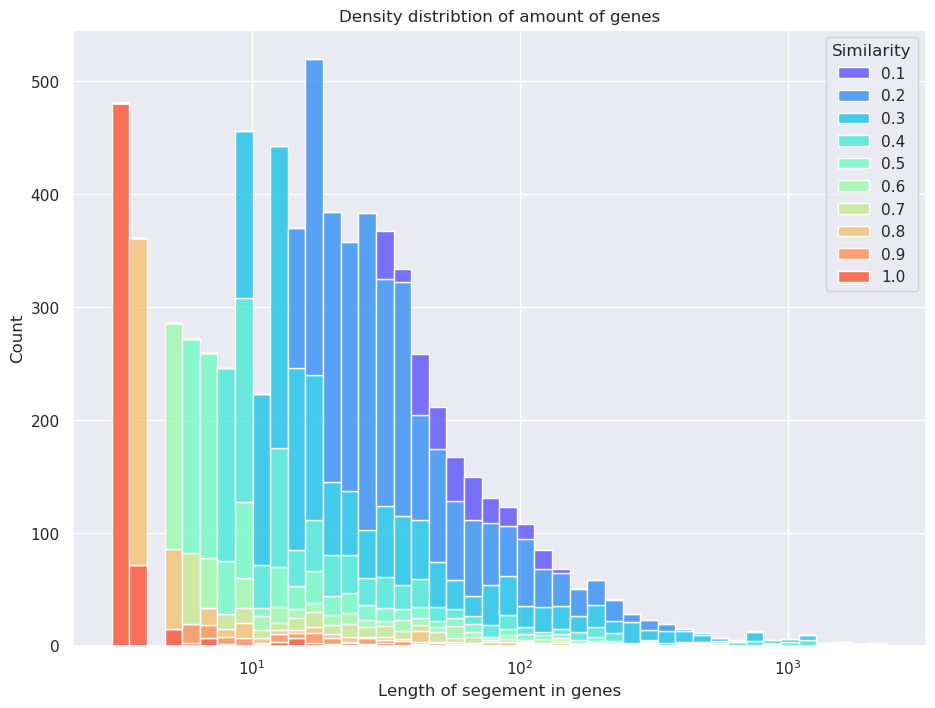

In [12]:
# sns.set_theme(rc={'figure.figsize':(11,8)})
# so = sns.histplot(data=df[df["profile_length"]<100], x="profile_length", hue="cat_similar", multiple="stack", palette="rainbow", binwidth=2)
# so.set(title="Density distribtion of amount of genes", xlabel="Length of segement in genes", ylabel="Count")
# so.axes.get_legend().set_title("Similarity")
# so.set_xlim(0,100)
# so.set_ylim(0,900)
# plt.show()


so = sns.histplot(data=df, x="profile_length", hue="cat_similar", multiple="stack", palette="rainbow", log_scale=True)
so.set(title="Density distribtion of amount of genes", xlabel="Length of segement in genes", ylabel="Count")
so.axes.get_legend().set_title("Similarity")
plt.show()

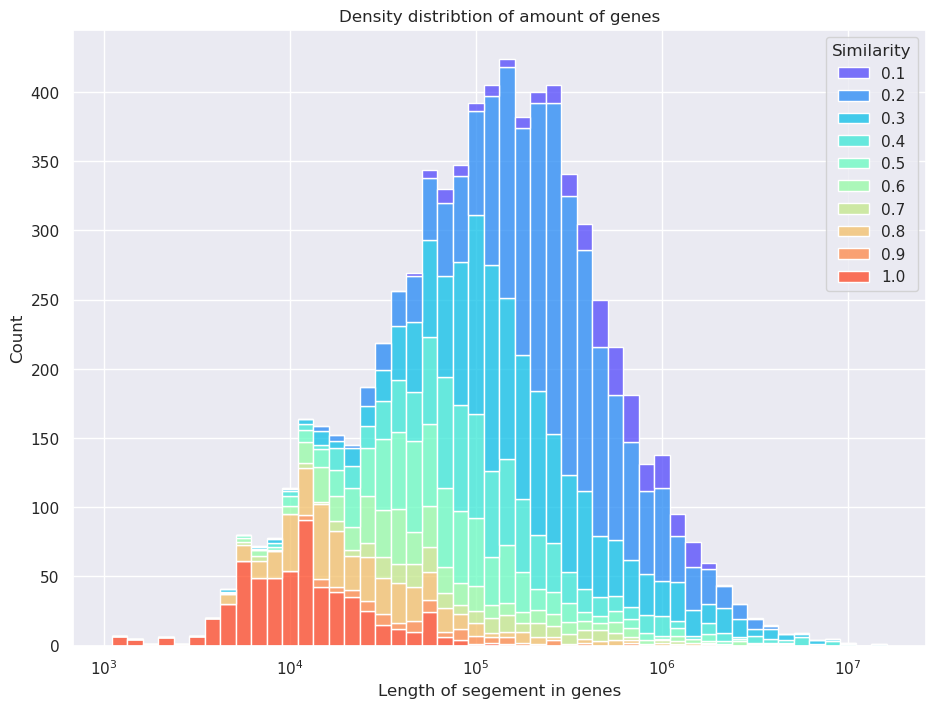

In [13]:
so = sns.histplot(data=df, x="len_x", hue="cat_similar", multiple="stack", palette="rainbow", log_scale=True)
so.set(title="Density distribtion of amount of genes", xlabel="Length of segement in genes", ylabel="Count")
so.axes.get_legend().set_title("Similarity")
# so.set_xlim(0,100)
# so.set_ylim(0,900)
plt.show()

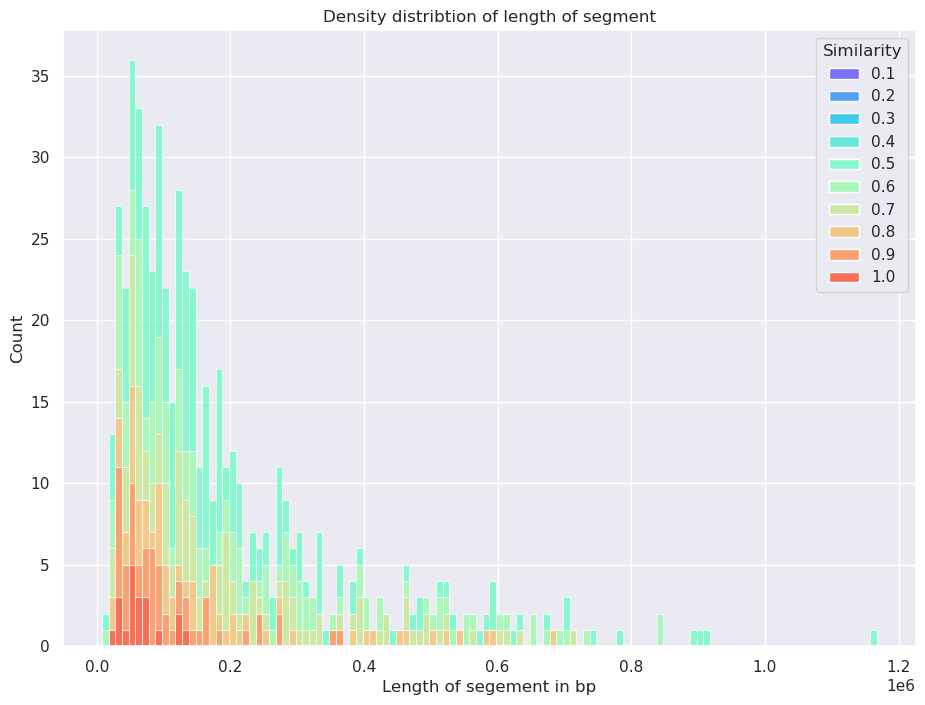

In [31]:
sns.set_theme(rc={'figure.figsize':(11,8)})
so = sns.histplot(data=df[(df["cat_similar"]>=0.5) & (df["profile_length"]>=10) & (df["profile_length"]<100)], x="len_x", hue="cat_similar", multiple="stack", palette="rainbow", binwidth=10000)
so.set(title="Density distribtion of length of segment", xlabel="Length of segement in bp", ylabel="Count")
so.axes.get_legend().set_title("Similarity")

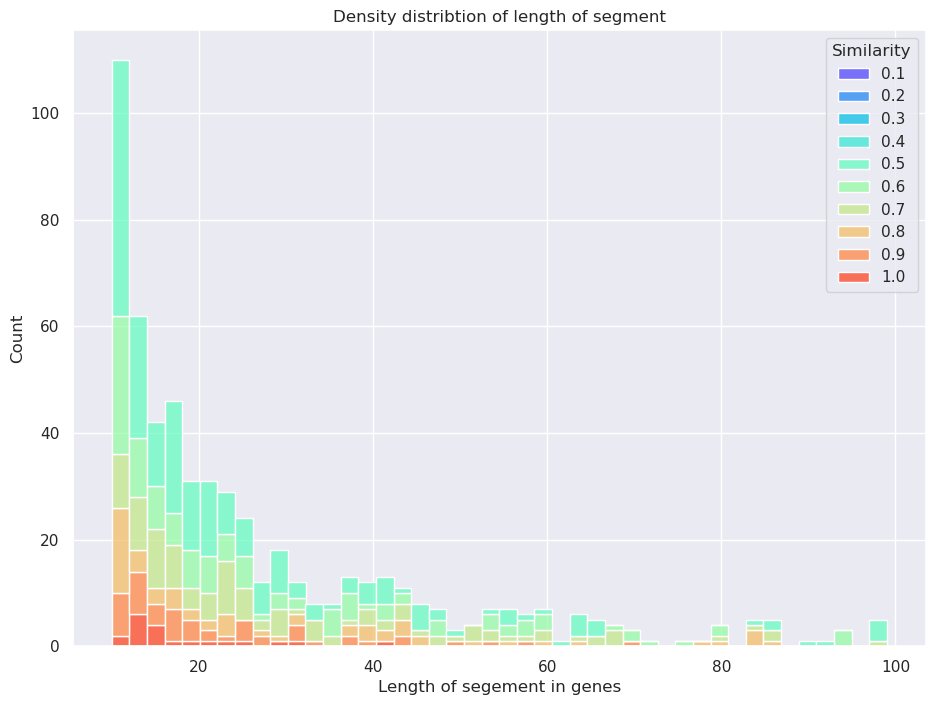

In [32]:
sns.set_theme(rc={'figure.figsize':(11,8)})
so = sns.histplot(data=df[(df["cat_similar"]>=0.5) & (df["profile_length"]>=10) & (df["profile_length"]<100)], x="profile_length", hue="cat_similar", multiple="stack", palette="rainbow", binwidth=2)
so.set(title="Density distribtion of length of segment", xlabel="Length of segement in genes", ylabel="Count")
so.axes.get_legend().set_title("Similarity")

<Axes: xlabel='percentage_similar', ylabel='Count'>

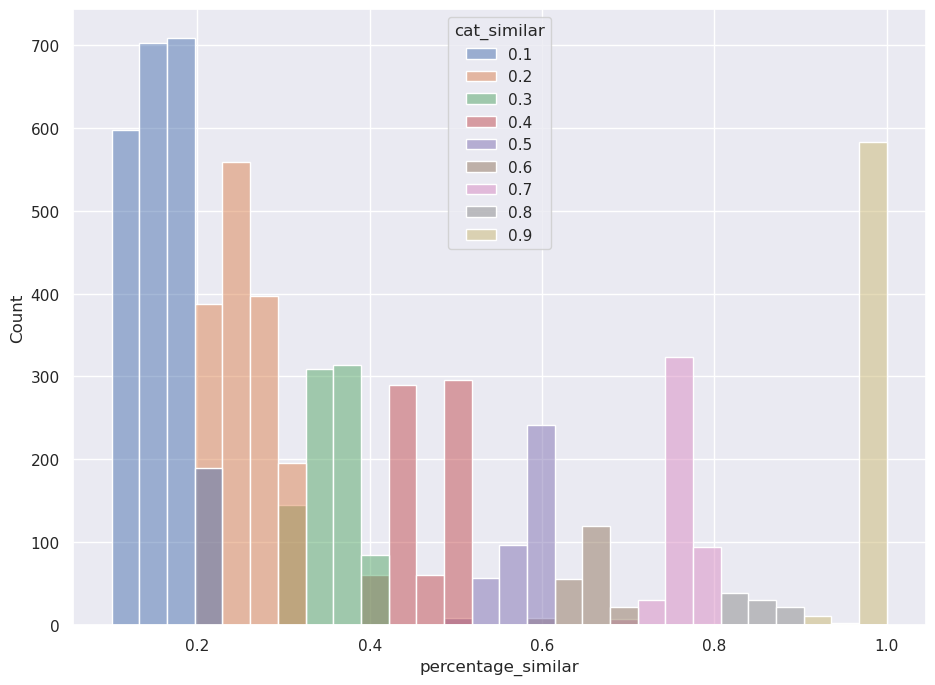

In [100]:
df.sort_values("percentage_similar", ascending=False)
sns.histplot(data=df, x="percentage_similar", hue="cat_similar")

In [ ]:
lv_2["percentage_cat"] =  pd.NA
lv_2["percentage_cat"][df_all["percentage_similar"]>0.8] = ">0.8"
lv_2["percentage_cat"][df_all["percentage_similar"]<0.8] = "0.3>x<0.8"
lv_2["percentage_cat"][df_all["percentage_similar"]<0.3] = "<0.3"

def stackhist(x, y, bins=10, range=(0,1), **kws):
    grouped = x.groupby(y)
    data = [d for _, d in grouped]
    labels = [l for l, _ in grouped]
    custom = [(0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]
    pallete = sns.set_palette(custom)
    
    if len(data)==0:
        plt.hist(data, histtype="barstacked", label=labels, color=pallete)
        return

    if range == None:
        range = (0, max([max(i) for i in data]))

    plt.hist(data, histtype="barstacked", label=labels, bins=bins, range=range)
    
# col_order = ['B cell', 'Cytotoxic T cell', 'Helper T cell', 'Memory T cell', 'Other T cell', 'Other cell', 'Regulatory T cell', 'Tumor cell', 'No cell']

def add_labels(g):
    for ax in g.axes:
        fuck_me = []
        for p in ax.patches:
            height = int(p.get_y() + p.get_height())
            center = p.get_x() + p.get_width() / 2.
            fuck_me.append([center, height, ax])
        
        fuck_me = np.array(fuck_me)
        counter = 0
        for p in ax.patches:
            height = int(p.get_y() + p.get_height())
            center = p.get_x() + p.get_width() / 2.
            draw = True
            for q in fuck_me:
                if center == q[0] and height > 4 and abs(height-q[1]) < 5 and height!= q[1] and height < q[1]:
                    draw = False
            if draw:
                counter+=1
                ax.annotate(height, (center , height),
                                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                                textcoords='offset points')


# df_all = df_all.rename({"subtype": "Cell type", "iou_score": "IOU score", "poI_score": "poi score"}, axis=1)
# display(df_all.head())
# sns.set_context("notebook", font_scale=1.2)
# sns.set_style("darkgrid", {"xtick.bottom": True})

g = sns.FacetGrid(lv_2, col="Cell type", col_order=col_order, height=4, aspect=1, col_wrap=3)
g.map(stackhist, "IOU score", "distance_cat", bins = 15, range=(0,1), multiple="stack", color=["Blue", "Orange", "Green"]).set(yscale = 'log')
g.add_legend(label_order= ['> 5', '<= 5', '<= 2',], title="Distance\nin pixels")
g.set_axis_labels(y="Distance")
g.set(ylabel="Log count")
g.set_titles("{col_name}")
g.figure.subplots_adjust(top=0.91)
g.figure.suptitle("IOU between StarDist segmentation and ImmuNet training labels")
add_labels(g)
sns.move_legend(g, "upper right",
                bbox_to_anchor=(0.907, 0.915),
                # bbox_to_anchor=(1, 1),
                facecolor="white",
                frameon=True,
                fontsize=12,
                title_fontsize=12)
g.figure.savefig("plots/Analyzing_stardist_segmentation/iou.png", dpi=300)

g = sns.FacetGrid(df_all, col="Cell type", col_order=col_order, height=4, aspect=1, col_wrap=3)
g.map(stackhist, "poi score", "distance_cat",bins = 16, range=(0,4), multiple="stack", color=["Blue", "Orange", "Green"]).set(yscale = 'log')
g.add_legend(label_order= ['> 5', '<= 5', '<= 2',], title="Distance\nin pixels")
g.refline(x=1, color="r")
g.set(ylabel="Log count", xlabel="Relative size in percentage (%)")
g.set_titles("{col_name}")
g.figure.subplots_adjust(top=0.91)
g.figure.suptitle("Size of StarDist segmentation relative to the size of training labels")
sns.move_legend(g, "upper right", 
                bbox_to_anchor=(0.89, 0.915),
                # bbox_to_anchor=(1, 1),
                facecolor="white", frameon=True,
                fontsize=12,
                title_fontsize=12)
add_labels(g)
g.figure.savefig("plots/Analyzing_stardist_segmentation/poa.png", dpi=300)